<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 73.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 109.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 108.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 108.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 24.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138905 sha256=078419e2264bc3e2efb3003d220214d3

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'yfinance'

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.


In [6]:
import yfinance as yf

# Step 1: Create the Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Step 2: Obtain historical data
tesla_data = tesla.history(period="max")

# Step 3: Reset the index
tesla_data.reset_index(inplace=True)

# Step 4: Save and display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


 Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. 


In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Fetch the Tesla revenue page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Find all tables and select the second one
tables = soup.find_all('table')
second_table = tables[1]  # Index 1 for the second table

# Step 3: Prepare lists to store the data
data = []

# Step 4: Loop through table rows and extract data from the second table
for row in second_table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:  # Ensure there are enough columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Step 5: Create a DataFrame from the data
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Step 6: Reset the index
tesla_revenue.reset_index(drop=True, inplace=True)

# Step 7: Display the last five rows
print(tesla_revenue.tail())


          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [9]:
import yfinance as yf

# Step 1: Create the Ticker object for GameStop
gme = yf.Ticker("GME")

# Step 2: Obtain historical data for the maximum available period
gme_data = gme.history(period="max")

# Step 3: Reset the index to make Date a column instead of the index
gme_data.reset_index(inplace=True)

# Step 4: Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607505   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Display the last five rows of the gme_revenue dataframe using the tail function.

In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Set up the URL and fetch the page content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Locate all tables with the specified class and select the second one
tables = soup.find_all("table", {"class": "historical_data_table table"})
second_table = tables[1]  # Index 1 to select the second table

# Step 3: Extract data from the second table's rows
data = []
for row in second_table.find_all("tr")[1:]:  # Skip header row
    cols = row.find_all("td")
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Step 4: Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Step 5: Display the last five rows
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph


Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

                          Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3605 2024-10-24 00:00:00-04:00  244.679993  262.119995  242.649994   
3606 2024-10-25 00:00:00-04:00  256.010010  269.489990  255.320007   
3607 2024-10-28 00:00:00-04:00  270.000000  273.540009  262.239990   
3608 2024-10-29 00:00:00-04:00  264.510010  264.980011  255.509995   
3609 2024-10-30 00:00:00-04:00  258.040009  263.350006  255.820007   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  257806500        0.0           

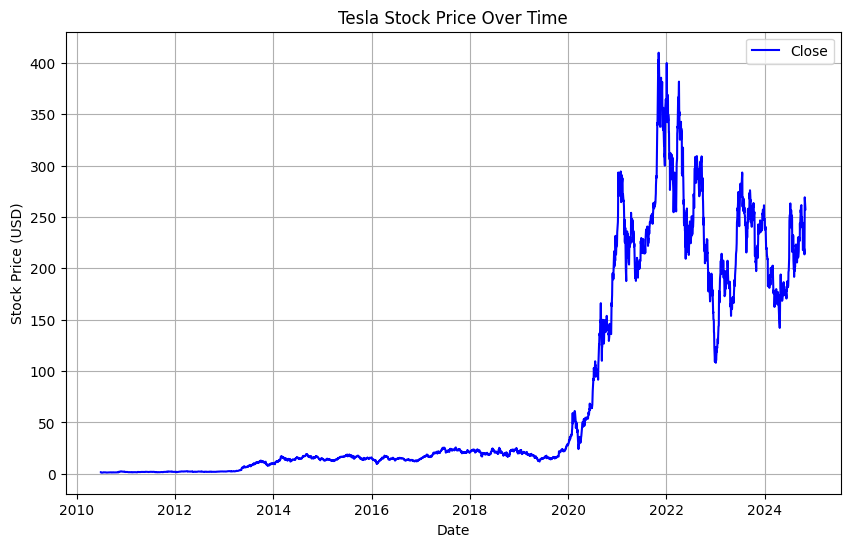

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Define the make_graph function
def make_graph(data, column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data[column], label=column, color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 2: Obtain Tesla stock data and reset the index
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)



# Step 3: Call the make_graph function to plot the data
make_graph(tesla_data, "Close", "Tesla Stock Price Over Time")


## Question 6: Plot GameStop Stock Graph


Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

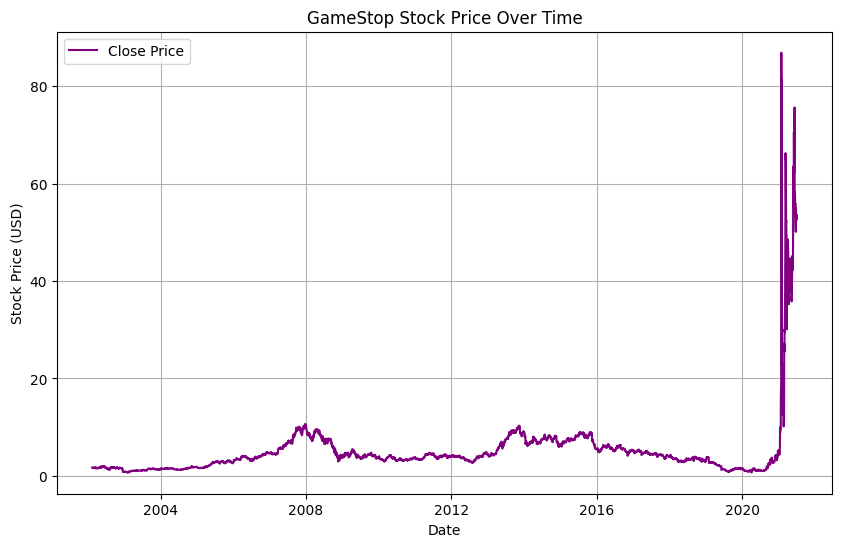

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the make_graph function
def make_graph(data, revenue_data, title):
    # Filter data up to June 2021
    data = data[data['Date'] <= '2021-06-30']

    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price", color='purple')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"{title} Stock Price Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 2: Obtain GameStop stock data and reset the index
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Placeholder for gme_revenue DataFrame (as per function structure)
gme_revenue = pd.DataFrame()  # Normally would be populated with actual revenue data if needed


# Step 3: Call the make_graph function to plot the data
make_graph(gme_data, gme_revenue, 'GameStop')

                          Date       Open       High        Low      Close  \
0    2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691667   
1    2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683251   
2    2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658001   1.674834   
3    2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
4    2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                        ...        ...        ...        ...        ...   
5713 2024-10-24 00:00:00-04:00  20.629999  20.840000  20.480000  20.629999   
5714 2024-10-25 00:00:00-04:00  20.650000  21.430000  20.540001  20.570000   
5715 2024-10-28 00:00:00-04:00  20.840000  22.770000  20.730000  22.730000   
5716 2024-10-29 00:00:00-04:00  22.700001  23.200001  22.090000  22.680000   
5717 2024-10-30 00:00:00-04:00  23.400000  24.540001  22.750000  23.280001   

        Volume  Dividends  Stock Splits  
0     76216000       